El dataset proviene de la misión Gaia, un telescopio espacial de la Agencia Espacial Europea (ESA). La principal misión de Gaia es crear el mapa tridimensional más grande y preciso de nuestra galaxia, la Vía Láctea.

In [163]:
# Importar el o los módulos necesarios para analizar y limpiar los datos.
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

https://gea.esac.esa.int/archive

https://cdn.gea.esac.esa.int/Gaia/gdr3/Astrophysical_parameters/astrophysical_parameters_supp


La estructura general es: [ParámetroFísico]_[MóduloDeAnálisis]_[ModeloOpcional]_[IncertidumbreOpcional]

**Parámetro Físico:** Qué se está midiendo.

**Módulo de Análisis:** Cómo se midió.

**Modelo Opcional:** Qué "libro de reglas" o modelo teórico se usó.

**Incertidumbre Opcional:** El margen de error (_lower y _upper).

Parámetros Fundamentales de la Estrella:
source_id: El DNI o identificador único de cada estrella en el catálogo de Gaia. Es la variable más importante para identificar un objeto.

**teff (Temperatura Efectiva)**: Es la temperatura de la superficie de la estrella, medida en Kelvin (K). Este valor determina el color de la estrella. Estrellas frías son rojizas (~3,000 K), mientras que las estrellas muy calientes son azuladas (>10,000 K). El Sol tiene una teff de unos 5,778 K.

**logg (Logaritmo de la Gravedad Superficial)**: Mide qué tan fuerte es la gravedad en la superficie de la estrella. Un valor alto (ej. 4.0-4.5) indica una estrella densa y compacta, como una enana (el Sol). Un valor bajo (ej. 1.0-2.0) indica una estrella "hinchada" y poco densa, como una gigante roja. Es un indicador clave de la etapa evolutiva de la estrella.

**mh (Metalicidad)**: Describe la abundancia de elementos más pesados que el hidrógeno y el helio en la estrella. Es una especie de "reloj cósmico". Las estrellas más viejas, formadas al principio del universo, son pobres en metales (mh negativo). Las estrellas más jóvenes, como el Sol (mh cercano a 0), se formaron a partir de gas enriquecido por generaciones anteriores de estrellas.

**radius:** El radio de la estrella, generalmente medido en radios solares.

**distance:** La distancia desde la Tierra a la estrella, medida en parsecs

Parámetros de Extinción (El "Polvo" Interestelar):
ag, azero, ebpminrp: Estos parámetros miden la extinción, es decir, cuánta luz de la estrella es bloqueada y enrojecida por el polvo y gas que hay entre ella y nosotros. Es como mirar una bombilla a través de una nube de humo: se ve más tenue y más rojiza de lo que realmente es. Estos valores son cruciales para corregir las mediciones y conocer el brillo y color verdaderos de la estrella.

In [164]:
original_df = pd.read_csv(
    r"C:\\Users\\perez\\OneDrive - Universidad Distrital Francisco José de Caldas\\UD\\Minería de Datos\\Mineria_de_Datos\\Tareas\\Tarea 2\\AstrophysicalParametersSupp_460409-460419.csv",
    comment="#",   # Ignora todas las líneas que empiezan con #
)

In [165]:
# Para visualizar los datos usamos el método head(). Esta función, por defecto, nos mostrará los datos de los primeros
# cinco registros del dataset. Si queremos ver más registros debemos indicarle al método el número de registros que
# queremos visualizar. E.g. head(8).
original_df.head()

,solution_id,source_id,libname_best_gspphot,teff_gspphot_marcs,teff_gspphot_marcs_lower,teff_gspphot_marcs_upper,logg_gspphot_marcs,logg_gspphot_marcs_lower,logg_gspphot_marcs_upper,mh_gspphot_marcs,...,mass_flame_spec_upper,age_flame_spec,age_flame_spec_lower,age_flame_spec_upper,flags_flame_spec,evolstage_flame_spec,gravredshift_flame_spec,gravredshift_flame_spec_lower,gravredshift_flame_spec_upper,bc_flame_spec
0,1636148068921376768,4049800392262226048,MARCS,4796.6550,4733.0396,4910.1943,3.2006,3.0708,3.3459,0.1133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1636148068921376768,4049800392262244736,PHOENIX,4736.0625,4721.2140,4758.2666,2.8239,2.8114,2.8335,0.4271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1636148068921376768,4049800392262255104,PHOENIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1636148068921376768,4049800392262274944,MARCS,5695.1580,5670.1045,5720.3228,4.5192,4.5057,4.5328,-0.7275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1636148068921376768,4049800392262281344,PHOENIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
original_df.tail()

,solution_id,source_id,libname_best_gspphot,teff_gspphot_marcs,teff_gspphot_marcs_lower,teff_gspphot_marcs_upper,logg_gspphot_marcs,logg_gspphot_marcs_lower,logg_gspphot_marcs_upper,mh_gspphot_marcs,...,mass_flame_spec_upper,age_flame_spec,age_flame_spec_lower,age_flame_spec_upper,flags_flame_spec,evolstage_flame_spec,gravredshift_flame_spec,gravredshift_flame_spec_lower,gravredshift_flame_spec_upper,bc_flame_spec
92099,1636148068921376768,4049897119276523136,PHOENIX,4935.4470,4854.0693,5105.1730,2.4790,2.3939,2.6658,-0.2028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92100,1636148068921376768,4049897119276525440,MARCS,4948.5156,4921.8100,4981.0996,3.6717,3.6169,3.7280,0.0097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92101,1636148068921376768,4049897119276525696,MARCS,5299.4960,5247.5590,5356.8440,3.5343,3.4875,3.5880,-0.7325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92102,1636148068921376768,4049897119276526592,MARCS,4941.6500,4888.4060,5026.1260,4.7665,4.7144,4.7941,-1.4600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92103,1636148068921376768,4049897119276527744,MARCS,4040.9277,4001.6416,4139.2886,4.8499,4.6722,4.9400,-1.0170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# Usamos el atributo shape para observar el tamaño del dataset.
original_df.shape

(92104, 175)

In [168]:
original_df.columns[:100]

Index(['solution_id', 'source_id', 'libname_best_gspphot',
       'teff_gspphot_marcs', 'teff_gspphot_marcs_lower',
       'teff_gspphot_marcs_upper', 'logg_gspphot_marcs',
       'logg_gspphot_marcs_lower', 'logg_gspphot_marcs_upper',
       'mh_gspphot_marcs', 'mh_gspphot_marcs_lower', 'mh_gspphot_marcs_upper',
       'distance_gspphot_marcs', 'distance_gspphot_marcs_lower',
       'distance_gspphot_marcs_upper', 'azero_gspphot_marcs',
       'azero_gspphot_marcs_lower', 'azero_gspphot_marcs_upper',
       'ag_gspphot_marcs', 'ag_gspphot_marcs_lower', 'ag_gspphot_marcs_upper',
       'abp_gspphot_marcs', 'abp_gspphot_marcs_lower',
       'abp_gspphot_marcs_upper', 'arp_gspphot_marcs',
       'arp_gspphot_marcs_lower', 'arp_gspphot_marcs_upper',
       'ebpminrp_gspphot_marcs', 'ebpminrp_gspphot_marcs_lower',
       'ebpminrp_gspphot_marcs_upper', 'mg_gspphot_marcs',
       'mg_gspphot_marcs_lower', 'mg_gspphot_marcs_upper',
       'radius_gspphot_marcs', 'radius_gspphot_marcs_lower',

In [169]:
original_df.columns[100:175]

Index(['mg_gspphot_ob', 'mg_gspphot_ob_lower', 'mg_gspphot_ob_upper',
       'radius_gspphot_ob', 'radius_gspphot_ob_lower',
       'radius_gspphot_ob_upper', 'logposterior_gspphot_ob',
       'mcmcaccept_gspphot_ob', 'teff_gspphot_a', 'teff_gspphot_a_lower',
       'teff_gspphot_a_upper', 'logg_gspphot_a', 'logg_gspphot_a_lower',
       'logg_gspphot_a_upper', 'mh_gspphot_a', 'mh_gspphot_a_lower',
       'mh_gspphot_a_upper', 'distance_gspphot_a', 'distance_gspphot_a_lower',
       'distance_gspphot_a_upper', 'azero_gspphot_a', 'azero_gspphot_a_lower',
       'azero_gspphot_a_upper', 'ag_gspphot_a', 'ag_gspphot_a_lower',
       'ag_gspphot_a_upper', 'abp_gspphot_a', 'abp_gspphot_a_lower',
       'abp_gspphot_a_upper', 'arp_gspphot_a', 'arp_gspphot_a_lower',
       'arp_gspphot_a_upper', 'ebpminrp_gspphot_a', 'ebpminrp_gspphot_a_lower',
       'ebpminrp_gspphot_a_upper', 'mg_gspphot_a', 'mg_gspphot_a_lower',
       'mg_gspphot_a_upper', 'radius_gspphot_a', 'radius_gspphot_a_lower',
   

In [171]:
# Usamos el método info() para obtener información de las columnas del dataset.
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92104 entries, 0 to 92103
Columns: 175 entries, solution_id to bc_flame_spec
dtypes: float64(172), int64(2), object(1)
memory usage: 123.0+ MB


In [172]:
# Usamos el método descibre para obtener datos estadísticos de las columnas de tipo numérico.
original_df.describe().T

,count,mean,std,min,25%,50%,75%,max
solution_id,92104.0,1.636148e+18,0.000000e+00,1.636148e+18,1.636148e+18,1.636148e+18,1.636148e+18,1.636148e+18
source_id,92104.0,4.049847e+18,2.778535e+13,4.049800e+18,4.049823e+18,4.049846e+18,4.049871e+18,4.049897e+18
teff_gspphot_marcs,81637.0,4.676224e+03,5.091133e+02,2.912111e+03,4.367885e+03,4.683658e+03,4.917386e+03,7.999631e+03
teff_gspphot_marcs_lower,81637.0,4.629275e+03,5.033724e+02,2.904009e+03,4.326332e+03,4.638523e+03,4.866490e+03,7.998898e+03
teff_gspphot_marcs_upper,81637.0,4.730787e+03,5.188172e+02,2.920210e+03,4.416286e+03,4.733539e+03,4.980269e+03,7.999913e+03
...,...,...,...,...,...,...,...,...
evolstage_flame_spec,252.0,7.214563e+02,2.685429e+02,1.370000e+02,5.377500e+02,6.705000e+02,8.530000e+02,1.274000e+03
gravredshift_flame_spec,252.0,1.238032e-01,1.403434e-01,1.256156e-02,3.870417e-02,7.431018e-02,1.597850e-01,6.527513e-01
gravredshift_flame_spec_lower,252.0,9.744210e-02,1.157342e-01,6.837279e-03,2.615799e-02,5.733674e-02,1.262753e-01,5.703760e-01
gravredshift_flame_spec_upper,252.0,1.567629e-01,1.677852e-01,2.011751e-02,5.915746e-02,1.001640e-01,1.878066e-01,7.736059e-01


In [173]:
# Verificamos el total de valores nulos en cada columna.
original_df.isna().sum()

solution_id                          0
source_id                            0
libname_best_gspphot               157
teff_gspphot_marcs               10467
teff_gspphot_marcs_lower         10467
                                 ...  
evolstage_flame_spec             91852
gravredshift_flame_spec          91852
gravredshift_flame_spec_lower    91852
gravredshift_flame_spec_upper    91852
bc_flame_spec                    91852
Length: 175, dtype: int64

In [174]:
# Si usamos el método describe() con el parámetros include='0' podemos ver información adicional de las columnas
# que tienen valores categóricos.
original_df.describe(include='O').T

# top es la moda de la columna
# freq es la frecuencia de la moda

,count,unique,top,freq
libname_best_gspphot,91947,4,PHOENIX,45517


In [175]:
# Observamos los valores únicos de la columna 'libname_best_gspphot'
original_df['libname_best_gspphot'].unique()

array(['MARCS', 'PHOENIX', 'OB', 'A', nan], dtype=object)

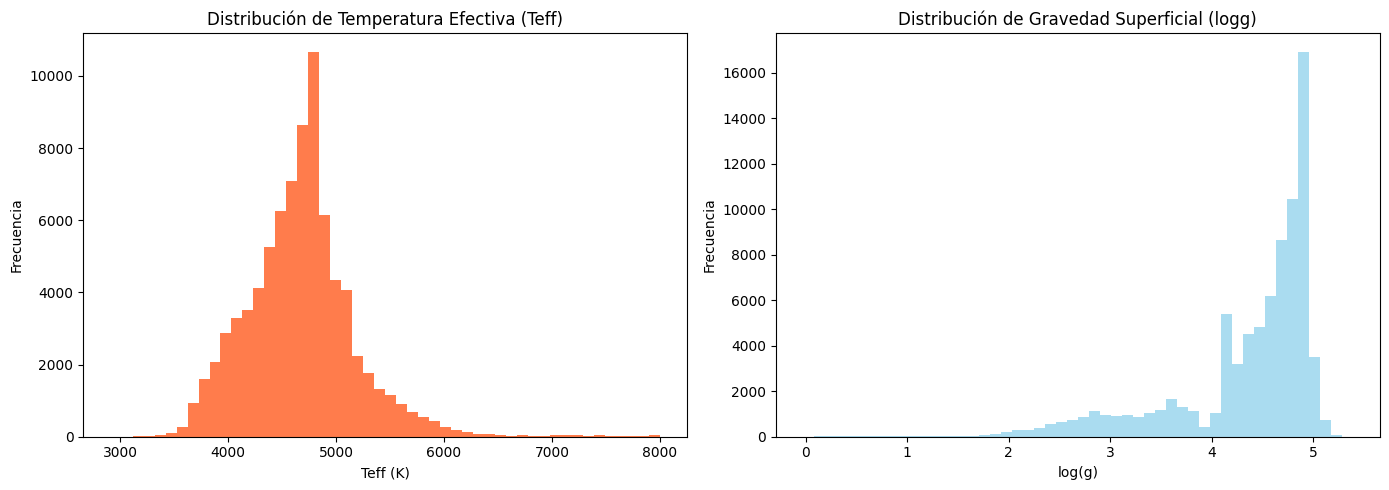

In [176]:
# Obtenemos las columnas, quitando los nulos para poder graficar sin errores.
teff_marcs = original_df['teff_gspphot_marcs'].dropna()
logg_marcs = original_df['logg_gspphot_marcs'].dropna()

# Creamos los histogramas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(teff_marcs, bins=50, color='orangered', alpha=0.7)
axes[0].set_title('Distribución de Temperatura Efectiva (Teff)')
axes[0].set_xlabel('Teff (K)')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(logg_marcs, bins=50, color='skyblue', alpha=0.7)
axes[1].set_title('Distribución de Gravedad Superficial (logg)')
axes[1].set_xlabel('log(g)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [184]:
# Creamos una copia del dataframe original usando el método copy().
df_toclean = original_df.copy()

# La columna 'libname_best_gspphot' es CRÍTICA. Nos dice qué modelo usar.
# Si esta columna es nula, no podemos consolidar los datos de esa estrella de forma fiable.
# Por lo tanto, eliminamos las filas donde este valor es nulo.
df_toclean = df_toclean[df_toclean['libname_best_gspphot'].notnull()]

# Es sumamente importante resetear el índice de los datos después de eliminar filas.
df_toclean = df_toclean.reset_index(drop=True)

df_toclean.shape

(91947, 175)

In [185]:
df_toclean.isna().sum()

solution_id                          0
source_id                            0
libname_best_gspphot                 0
teff_gspphot_marcs               10310
teff_gspphot_marcs_lower         10310
                                 ...  
evolstage_flame_spec             91807
gravredshift_flame_spec          91807
gravredshift_flame_spec_lower    91807
gravredshift_flame_spec_upper    91807
bc_flame_spec                    91807
Length: 175, dtype: int64

In [186]:
# Porcentaje de nulos por columna
null_percentage = (df_toclean.isnull().sum() / len(df_toclean)) * 100
null_percentage.sort_values(ascending=False).head(30)

age_flame_spec_upper             99.966285
age_flame_spec_lower             99.966285
age_flame_spec                   99.966285
mass_flame_spec_upper            99.919519
mass_flame_spec_lower            99.919519
mass_flame_spec                  99.919519
radius_flame_spec_lower          99.847738
lum_flame_spec_upper             99.847738
lum_flame_spec_lower             99.847738
flags_flame_spec                 99.847738
evolstage_flame_spec             99.847738
gravredshift_flame_spec          99.847738
gravredshift_flame_spec_lower    99.847738
radius_flame_spec_upper          99.847738
lum_flame_spec                   99.847738
radius_flame_spec                99.847738
gravredshift_flame_spec_upper    99.847738
bc_flame_spec                    99.847738
alphafe_gspspec_ann_upper        99.827074
mh_gspspec_ann                   99.827074
mh_gspspec_ann_lower             99.827074
alphafe_gspspec_ann              99.827074
mh_gspspec_ann_upper             99.827074
alphafe_gsp

In [187]:
# Selecciona las columnas con más del 90% de nulos
cols_to_drop = null_percentage[null_percentage > 90].index.tolist()

# Elimina esas columnas del DataFrame
df_toclean.drop(columns=cols_to_drop, inplace=True)

df_toclean.shape

(91947, 143)

In [188]:
df_toclean.isna().sum()

solution_id                     0
source_id                       0
libname_best_gspphot            0
teff_gspphot_marcs          10310
teff_gspphot_marcs_lower    10310
                            ...  
radius_gspphot_a            12257
radius_gspphot_a_lower      12257
radius_gspphot_a_upper      12257
logposterior_gspphot_a      12257
mcmcaccept_gspphot_a        12257
Length: 143, dtype: int64

In [189]:
df_toclean.isna().sum().sum()

np.int64(2040430)

In [190]:
# Revisa los valores únicos y su conteo en la columna de los modelos
print("Valores en 'libname_best_gspphot':")
print(df_toclean['libname_best_gspphot'].value_counts())


Valores en 'libname_best_gspphot':
libname_best_gspphot
PHOENIX    45517
MARCS      45450
A            896
OB            84
Name: count, dtype: int64


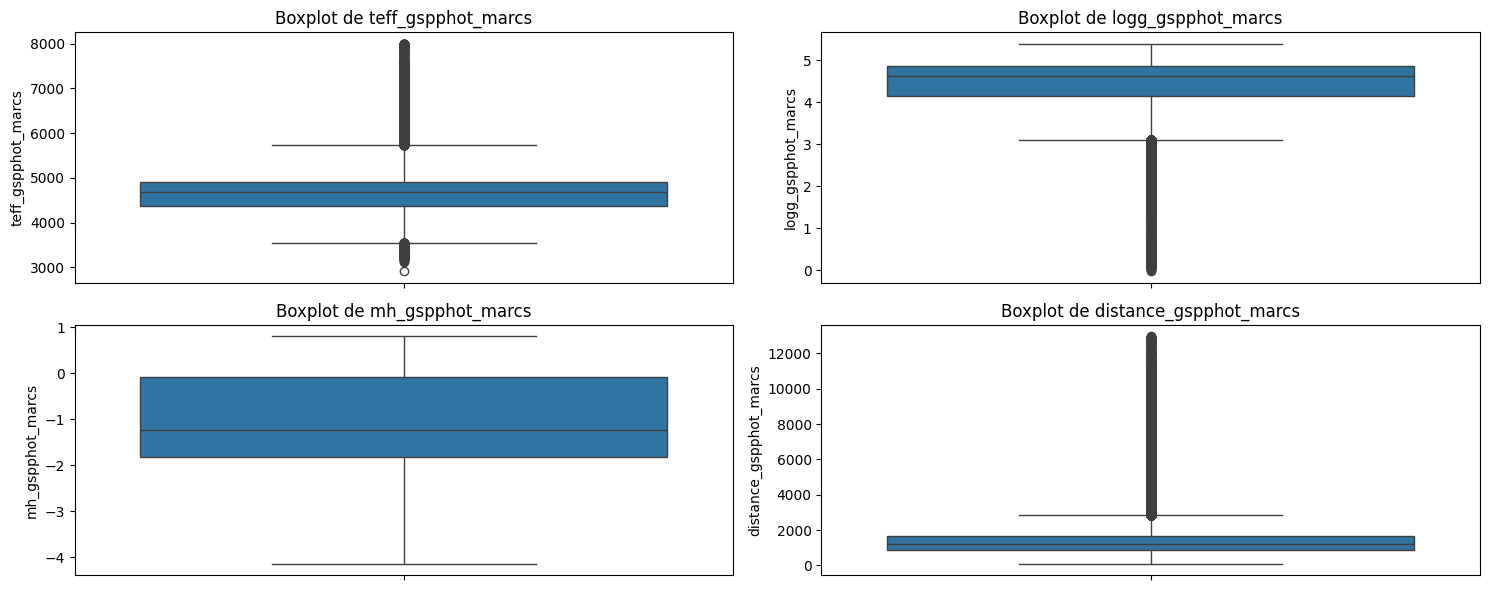

In [84]:
# Seleccionar columnas clave para análisis
key_columns = [
    'teff_gspphot_marcs', 
    'logg_gspphot_marcs', 
    'mh_gspphot_marcs',
    'distance_gspphot_marcs'
]

plt.figure(figsize=(15, 6))
for i, col in enumerate(key_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_toclean[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

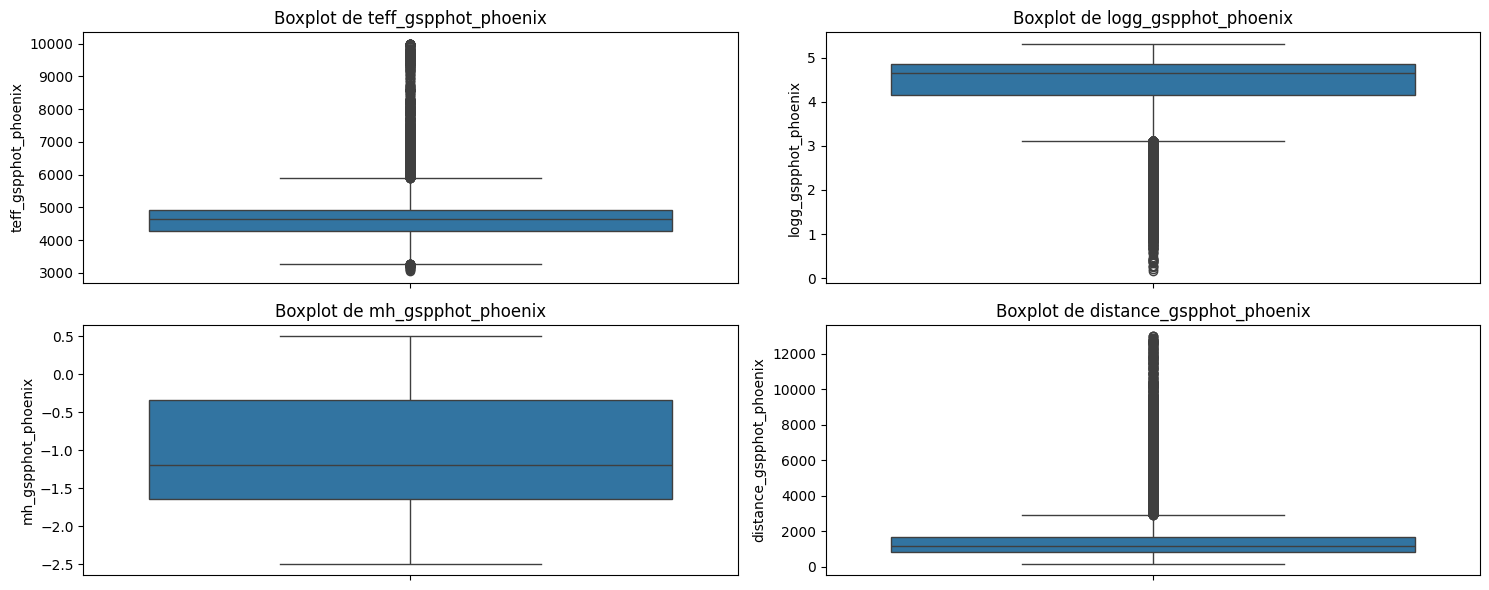

In [85]:
# Seleccionar columnas clave para análisis
key_columns = [
    'teff_gspphot_phoenix', 
    'logg_gspphot_phoenix', 
    'mh_gspphot_phoenix',
    'distance_gspphot_phoenix'
]

plt.figure(figsize=(15, 6))
for i, col in enumerate(key_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_toclean[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

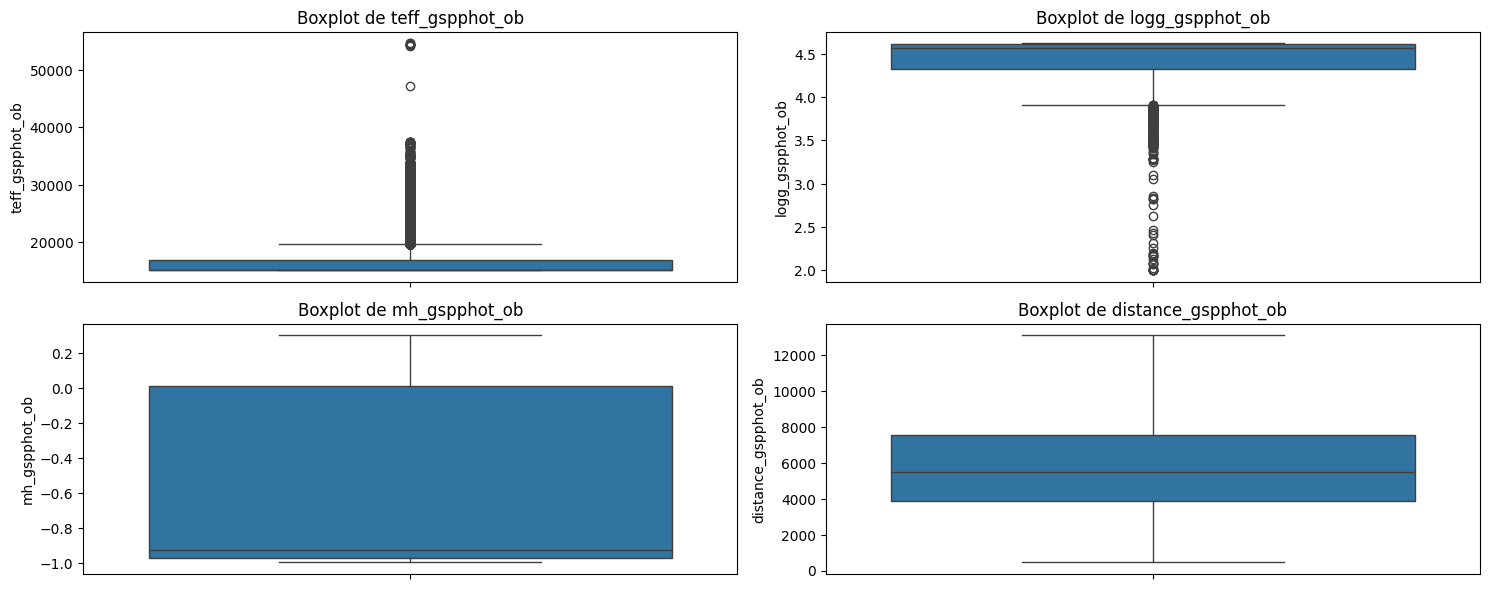

In [86]:
# Seleccionar columnas clave para análisis
key_columns = [
    'teff_gspphot_ob', 
    'logg_gspphot_ob', 
    'mh_gspphot_ob',
    'distance_gspphot_ob'
]

plt.figure(figsize=(15, 6))
for i, col in enumerate(key_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_toclean[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

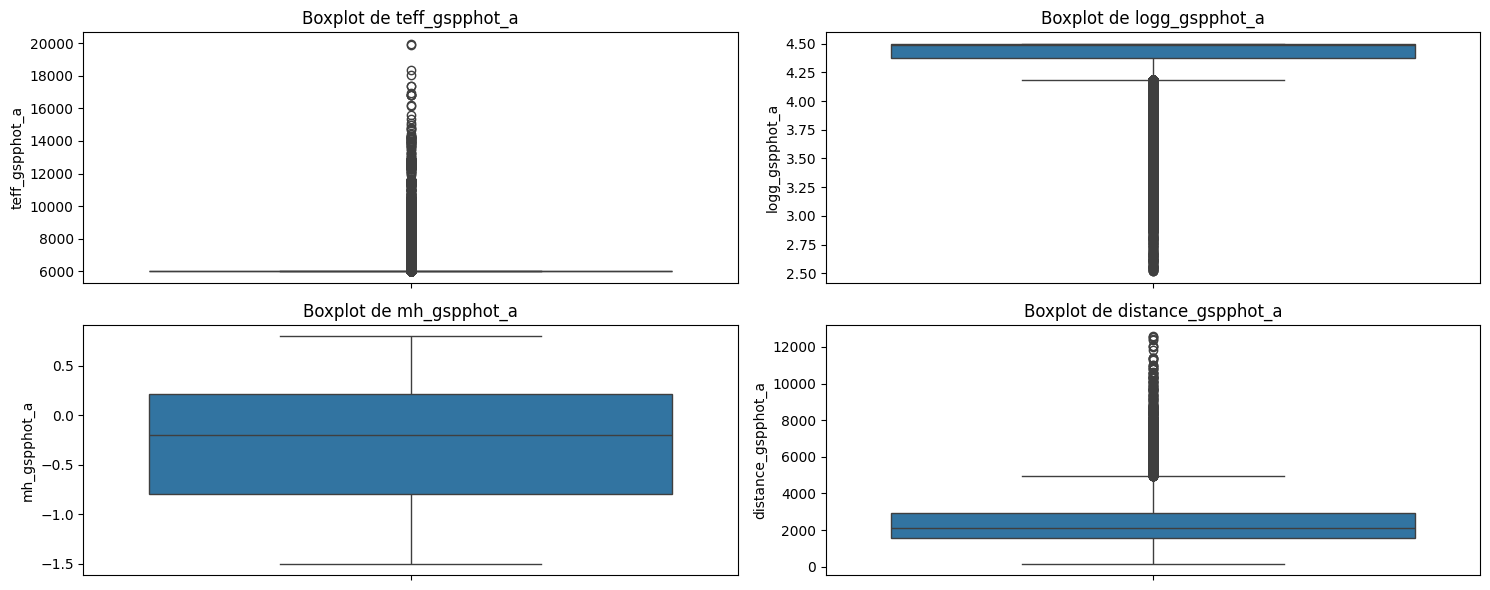

In [87]:
# Seleccionar columnas clave para análisis
key_columns = [
    'teff_gspphot_a', 
    'logg_gspphot_a', 
    'mh_gspphot_a',
    'distance_gspphot_a'
]

plt.figure(figsize=(15, 6))
for i, col in enumerate(key_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_toclean[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [191]:
# Convertimos todo a minúsculas y quitamos espacios al inicio o al final
df_toclean['libname_best_gspphot'] = df_toclean['libname_best_gspphot'].str.strip().str.lower()

# Verificamos cómo quedó. Ahora todos los nombres de modelos están limpios y en minúsculas.
print("Valores de la columna guía después de la limpieza:")
print(df_toclean['libname_best_gspphot'].value_counts())

Valores de la columna guía después de la limpieza:
libname_best_gspphot
phoenix    45517
marcs      45450
a            896
ob            84
Name: count, dtype: int64


In [192]:
# Lista de los parámetros físicos que nos interesan
params_to_consolidate = [
    'teff', 'logg', 'mh', 'distance', 'azero', 'ag', 'abp', 'arp',
    'ebpminrp', 'mg', 'radius'
]

# Lista de los modelos que usaremos como fuente de datos
models = ['marcs', 'phoenix', 'ob', 'a']

print("Parámetros a consolidar:", params_to_consolidate)
print("Modelos a usar:", models)

Parámetros a consolidar: ['teff', 'logg', 'mh', 'distance', 'azero', 'ag', 'abp', 'arp', 'ebpminrp', 'mg', 'radius']
Modelos a usar: ['marcs', 'phoenix', 'ob', 'a']


In [193]:
for param in params_to_consolidate:
    # Creamos la columna para el valor principal y la llenamos con 'NaN' (nulo)
    df_toclean[f'{param}_best'] = np.nan
    
    # Creamos las columnas para los errores y las llenamos con 'NaN'
    df_toclean[f'{param}_best_lower'] = np.nan
    df_toclean[f'{param}_best_upper'] = np.nan

# Mostramos las últimas 5 columnas para ver que se crearon correctamente
print("Nuevas columnas creadas (ejemplo):")
print(df_toclean.iloc[:, -5:].head())

Nuevas columnas creadas (ejemplo):
   mg_best_lower  mg_best_upper  radius_best  radius_best_lower  \
0            NaN            NaN          NaN                NaN   
1            NaN            NaN          NaN                NaN   
2            NaN            NaN          NaN                NaN   
3            NaN            NaN          NaN                NaN   
4            NaN            NaN          NaN                NaN   

   radius_best_upper  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  


In [194]:
# --- Rellenar las nuevas columnas con los mejores datos ---

# Recorremos cada parámetro de nuestra lista
for param in params_to_consolidate:
    # Y para cada parámetro, probamos cada modelo
    for model in models:
        
        # 1. Condición: ¿Qué filas usan este modelo?
        condition = df_toclean['libname_best_gspphot'] == model
        
        # 2. Origen: ¿Cómo se llama la columna de donde copiaremos los datos?
        source_col = f'{param}_gspphot_{model}'
        
        # 3. Copia: Si la columna de origen existe...
        if source_col in df_toclean.columns:
            # ...copia los valores a las columnas '_best' solo para las filas que cumplen la condición.
            df_toclean.loc[condition, f'{param}_best'] = df_toclean.loc[condition, source_col]
            df_toclean.loc[condition, f'{param}_best_lower'] = df_toclean.loc[condition, f'{source_col}_lower']
            df_toclean.loc[condition, f'{param}_best_upper'] = df_toclean.loc[condition, f'{source_col}_upper']

df_toclean.shape

(91947, 176)

In [195]:
# --- Eliminar columnas originales y redundantes ---

# Creamos una lista de todas las columnas 'gspphot' que NO sean '_best'
cols_to_drop = [col for col in df_toclean.columns if 'gspphot' in col and '_best' not in col]

# Las eliminamos del DataFrame
df_toclean.drop(columns=cols_to_drop, inplace=True, errors='ignore')

df_toclean.shape

(91947, 36)

In [196]:
df_toclean.isna().sum()

solution_id             0
source_id               0
libname_best_gspphot    0
teff_best               0
teff_best_lower         0
teff_best_upper         0
logg_best               0
logg_best_lower         0
logg_best_upper         0
mh_best                 0
mh_best_lower           0
mh_best_upper           0
distance_best           0
distance_best_lower     0
distance_best_upper     0
azero_best              0
azero_best_lower        0
azero_best_upper        0
ag_best                 0
ag_best_lower           0
ag_best_upper           0
abp_best                0
abp_best_lower          0
abp_best_upper          0
arp_best                0
arp_best_lower          0
arp_best_upper          0
ebpminrp_best           0
ebpminrp_best_lower     0
ebpminrp_best_upper     0
mg_best                 0
mg_best_lower           0
mg_best_upper           0
radius_best             0
radius_best_lower       0
radius_best_upper       0
dtype: int64

In [197]:
# Total de valores nulos en el DataFrame
df_toclean.isna().sum().sum()

np.int64(0)

In [198]:
df_toclean.info()

# Guardamos el DataFrame limpio en un nuevo archivo CSV
# index=False evita que se guarde una columna extra con el número de fila
df_toclean.to_csv('gaia_data_limpio.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91947 entries, 0 to 91946
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   solution_id           91947 non-null  int64  
 1   source_id             91947 non-null  int64  
 2   libname_best_gspphot  91947 non-null  object 
 3   teff_best             91947 non-null  float64
 4   teff_best_lower       91947 non-null  float64
 5   teff_best_upper       91947 non-null  float64
 6   logg_best             91947 non-null  float64
 7   logg_best_lower       91947 non-null  float64
 8   logg_best_upper       91947 non-null  float64
 9   mh_best               91947 non-null  float64
 10  mh_best_lower         91947 non-null  float64
 11  mh_best_upper         91947 non-null  float64
 12  distance_best         91947 non-null  float64
 13  distance_best_lower   91947 non-null  float64
 14  distance_best_upper   91947 non-null  float64
 15  azero_best         

In [199]:
df_toclean.describe().T

,count,mean,std,min,25%,50%,75%,max
solution_id,91947.0,1.636148e+18,0.000000e+00,1.636148e+18,1.636148e+18,1.636148e+18,1.636148e+18,1.636148e+18
source_id,91947.0,4.049847e+18,2.778689e+13,4.049800e+18,4.049823e+18,4.049846e+18,4.049871e+18,4.049897e+18
teff_best,91947.0,4.671855e+03,9.645912e+02,2.912111e+03,4.308139e+03,4.660136e+03,4.891018e+03,3.713804e+04
teff_best_lower,91947.0,4.627554e+03,9.429590e+02,2.904009e+03,4.261306e+03,4.619481e+03,4.843935e+03,3.585653e+04
teff_best_upper,91947.0,4.725636e+03,9.826636e+02,2.920210e+03,4.359442e+03,4.708378e+03,4.950026e+03,3.749453e+04
logg_best,91947.0,4.303189e+00,7.357231e-01,-2.340000e-02,4.118200e+00,4.570400e+00,4.840550e+00,5.384200e+00
logg_best_lower,91947.0,4.245410e+00,7.408386e-01,-4.430000e-02,4.094250e+00,4.491600e+00,4.775600e+00,5.303100e+00
logg_best_upper,91947.0,4.354397e+00,7.264884e-01,-1.620000e-02,4.147550e+00,4.625200e+00,4.885200e+00,5.394900e+00
mh_best,91947.0,-1.122847e+00,1.107759e+00,-4.138600e+00,-1.731450e+00,-1.174800e+00,-1.513000e-01,7.999000e-01
mh_best_lower,91947.0,-1.264779e+00,1.182114e+00,-4.147500e+00,-1.945400e+00,-1.329400e+00,-2.018000e-01,7.995000e-01
